<a href="https://colab.research.google.com/github/bray22/CloudComputing_ProgrammingAssignment1/blob/main/deutch_jozsa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deutsch-Jozsa Algorithm

# 1. Install Qiskit and NumPy

In [25]:
#!pip install qiskit ipywidgets
#!pip install qiskit[visualization]
#!pip install pylatexenc

# initialization
import numpy as np
import qiskit

# importing Qiskit
from qiskit import IBMQ, Aer, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit.providers.aer import AerSimulator
from qiskit import QuantumCircuit, assemble, transpile, execute

# import basic plot tools
from qiskit.visualization import plot_histogram, plot_bloch_multivector

In [3]:
# output qiskit version
qiskit.__qiskit_version__

{'qiskit-terra': '0.24.1', 'qiskit-aer': '0.12.0', 'qiskit-ignis': None, 'qiskit-ibmq-provider': '0.20.2', 'qiskit': '0.43.1', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

## 2. Build the Balanced Oracle
Create a balanced oracle by performing CNOTs with each input qubit as a control and the output bit as the target. For each qubit in our circuit, place an X-gate if the corresponding digit in b_str is 1, or do nothing if the digit is 0:

In [4]:
# set the length of the n-bit input string
n = 3
balanced_oracle = QuantumCircuit(n+1)
b_str = "101"

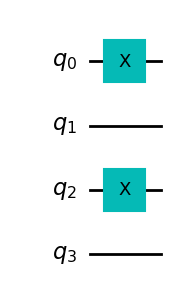

In [5]:
# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)
        #!pip install pylatexenc
balanced_oracle.draw('mpl')

# 2.1 Add controlled-NOT gates, using each input qubit as a control, and the output qubit as a target

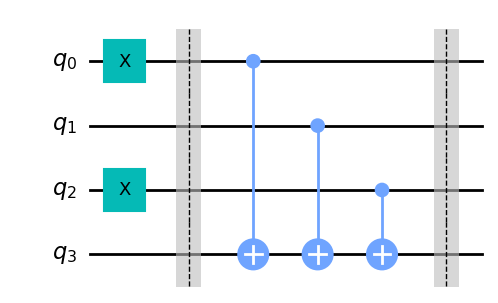

In [6]:
balanced_oracle = QuantumCircuit(n+1)
b_str = "101"

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Use barrier as divider
balanced_oracle.barrier()

# Controlled-NOT gates
for qubit in range(n):
    balanced_oracle.cx(qubit, n)

balanced_oracle.barrier()
balanced_oracle.draw('mpl')

# 2.2 Repeat the code from two cells up to finish wrapping the controls in X-gates:

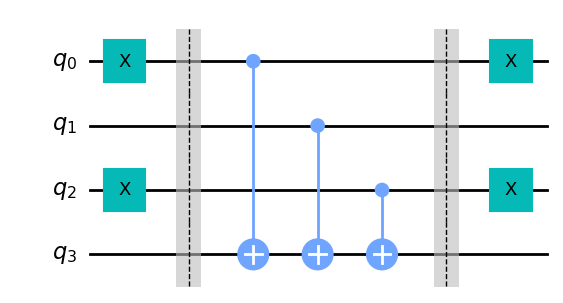

In [7]:
balanced_oracle = QuantumCircuit(n+1)
b_str = "101"

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Use barrier as divider
balanced_oracle.barrier()

# Controlled-NOT gates
for qubit in range(n):
    balanced_oracle.cx(qubit, n)

balanced_oracle.barrier()

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Show oracle
balanced_oracle.draw('mpl')

# 2.3 Build and Draw Curcuit

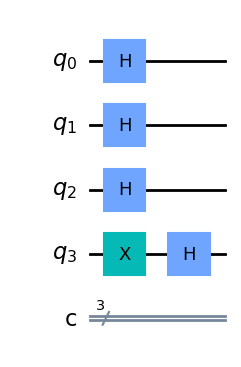

In [8]:
#Build Curcuit
dj_circuit = QuantumCircuit(n+1, n)

# Apply H-gates
for qubit in range(n):
    dj_circuit.h(qubit)

# Put qubit in state |->
dj_circuit.x(n)
dj_circuit.h(n)
dj_circuit.draw('mpl')

# 2.4 Apply Balanced Oracle

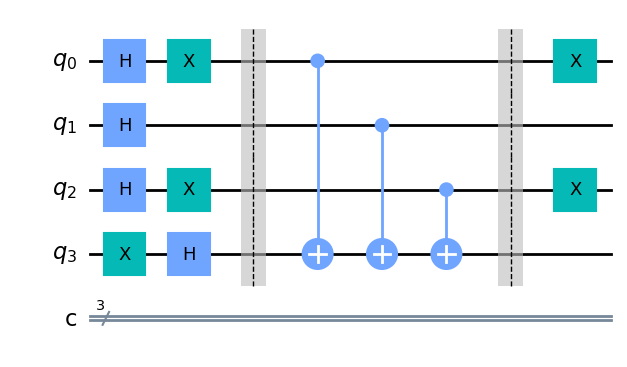

In [9]:
dj_circuit = QuantumCircuit(n+1, n)

# Apply H-gates
for qubit in range(n):
    dj_circuit.h(qubit)

# Put qubit in state |->
dj_circuit.x(n)
dj_circuit.h(n)

# Add oracle
dj_circuit &= balanced_oracle
dj_circuit.draw('mpl')

# 2.5 Perform H-gates on the input qubits, and measure the input register

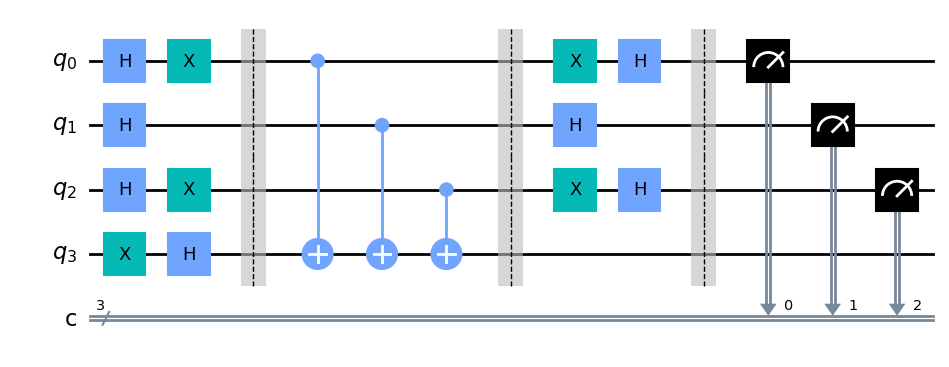

In [10]:
dj_circuit = QuantumCircuit(n+1, n)

# Apply H-gates
for qubit in range(n):
    dj_circuit.h(qubit)

# Put qubit in state |->
dj_circuit.x(n)
dj_circuit.h(n)

# Add oracle
dj_circuit &= balanced_oracle

# Repeat H-gates
for qubit in range(n):
    dj_circuit.h(qubit)
dj_circuit.barrier()

# Measure
for i in range(n):
    dj_circuit.measure(i, i)

# Display circuit
dj_circuit.draw('mpl')

# 2.6 Use Local Simulator

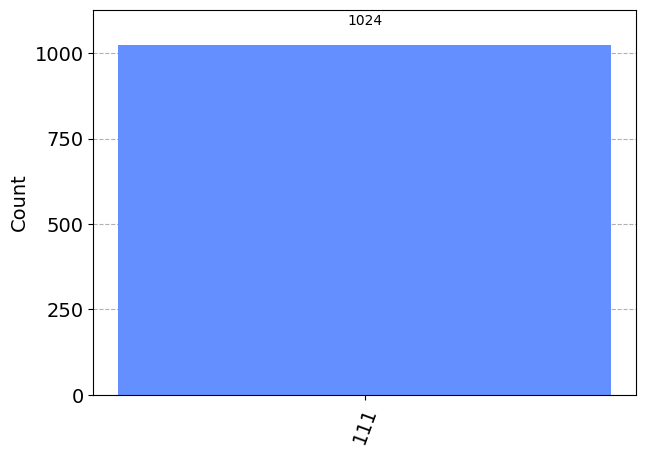

In [11]:
# use local simulator
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
results = execute(dj_circuit, backend=backend, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)

Results show that there's a 0% chance of measuring 000. This correctly predicts that the function is balanced.


## 3. Build the Constant Oracle

In a constant oracle case, the input has no effect on the ouput so the output qubit will be randomly set to 0 or 1:

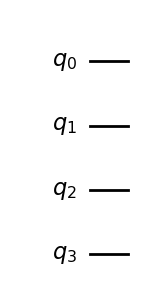

In [12]:
# set the length of the n-bit input string
n = 3

const_oracle = QuantumCircuit(n+1)

output = np.random.randint(2)
if output == 1:
    const_oracle.x(n)

const_oracle.draw(output='mpl')

# 3.1 Build the Circuit
Initialise the input qubits in the state
 and the output qubit in the state
:

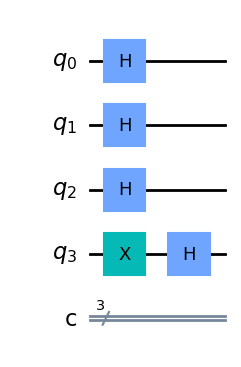

In [13]:
dj_circuit = QuantumCircuit(n+1, n)

# Apply H-gates
for qubit in range(n):
    dj_circuit.h(qubit)

# Put qubit in state |->
dj_circuit.x(n)
dj_circuit.h(n)
dj_circuit.draw(output='mpl')

# 3.2 Apply the constant oracle:

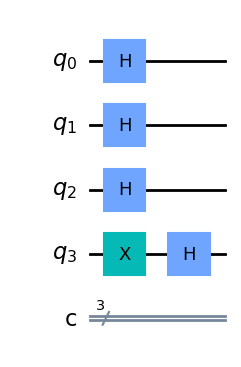

In [14]:
dj_circuit = QuantumCircuit(n+1, n)

# Apply H-gates
for qubit in range(n):
    dj_circuit.h(qubit)

# Put qubit in state |->
dj_circuit.x(n)
dj_circuit.h(n)

# Add oracle
dj_circuit &= const_oracle
dj_circuit.draw(output='mpl')

# 3.3 Perform H-gates on the input qubits, and measure the input register:

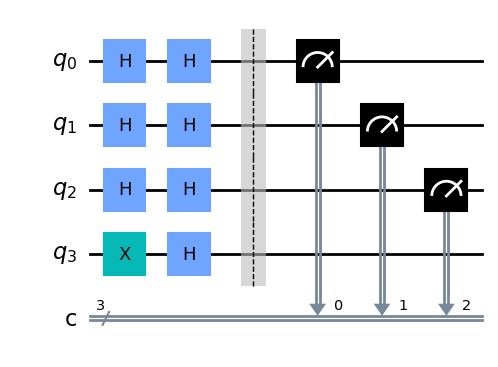

In [15]:
dj_circuit = QuantumCircuit(n+1, n)

# Apply H-gates
for qubit in range(n):
    dj_circuit.h(qubit)

# Put qubit in state |->
dj_circuit.x(n)
dj_circuit.h(n)

# Add oracle
dj_circuit &= const_oracle

# Repeat H-gates
for qubit in range(n):
    dj_circuit.h(qubit)
dj_circuit.barrier()

# Measure
for i in range(n):
    dj_circuit.measure(i, i)

# Display circuit
dj_circuit.draw(output='mpl')

# 3.4 Use local simulator

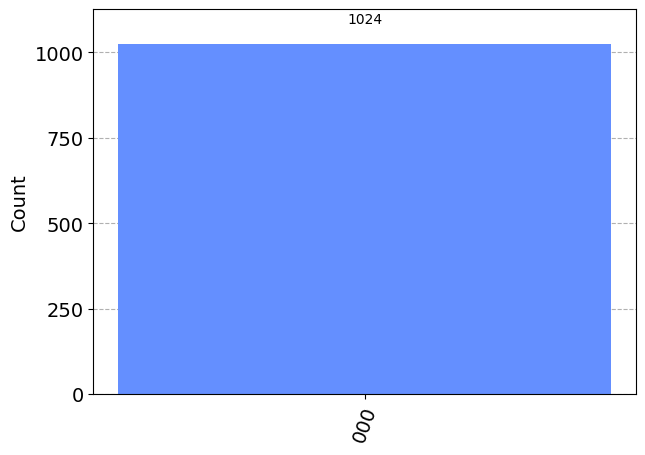

In [16]:
# use local simulator
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
results = execute(dj_circuit, backend=backend, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)

Results show that there's a 100% chance of measuring 000. This correctly predicts that the function is constant.

# 4. Build Oracle

In [17]:
def dj_oracle(case, n):
    # We need to make a QuantumCircuit object to return
    # This circuit has n+1 qubits: the size of the input,
    # plus one output qubit
    oracle_qc = QuantumCircuit(n+1)

    # First, let's deal with the case in which oracle is balanced
    if case == "balanced":
        # First generate a random number that tells us which CNOTs to
        # wrap in X-gates:
        b = np.random.randint(1,2**n)
        # Next, format 'b' as a binary string of length 'n', padded with zeros:
        b_str = format(b, '0'+str(n)+'b')
        # Next, we place the first X-gates. Each digit in our binary string
        # corresponds to a qubit, if the digit is 0, we do nothing, if it's 1
        # we apply an X-gate to that qubit:
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)
        # Do the controlled-NOT gates for each qubit, using the output qubit
        # as the target:
        for qubit in range(n):
            oracle_qc.cx(qubit, n)
        # Next, place the final X-gates
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)

    # Case in which oracle is constant
    if case == "constant":
        # First decide what the fixed output of the oracle will be
        # (either always 0 or always 1)
        output = np.random.randint(2)
        if output == 1:
            oracle_qc.x(n)

    oracle_gate = oracle_qc.to_gate()
    oracle_gate.name = "Oracle" # To show when we display the circuit
    return oracle_gate

Takes a oracle gate and performs the Deutsch-Joza algorithm on it:

In [18]:
def dj_algorithm(oracle, n):
    dj_circuit = QuantumCircuit(n+1, n)
    # Set up the output qubit:
    dj_circuit.x(n)
    dj_circuit.h(n)
    # And set up the input register:
    for qubit in range(n):
        dj_circuit.h(qubit)
    # Let's append the oracle gate to our circuit:
    dj_circuit.append(oracle, range(n+1))
    # Finally, perform the H-gates again and measure:
    for qubit in range(n):
        dj_circuit.h(qubit)

    for i in range(n):
        dj_circuit.measure(i, i)

    return dj_circuit

# 5. Run on Simulator

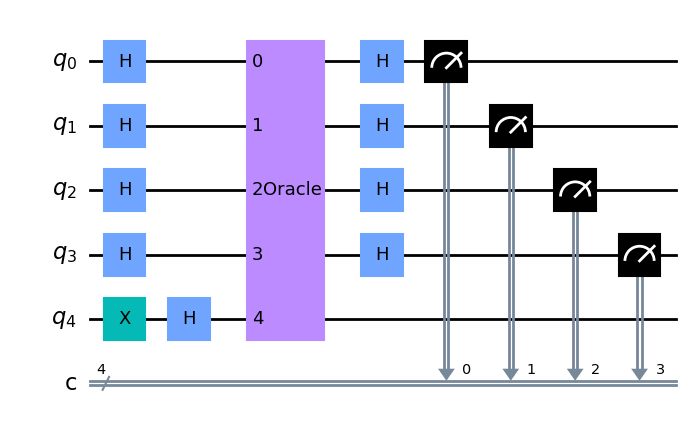

In [19]:
n = 4
oracle_gate = dj_oracle('balanced', n)
dj_circuit = dj_algorithm(oracle_gate, n)
dj_circuit.draw(output='mpl')

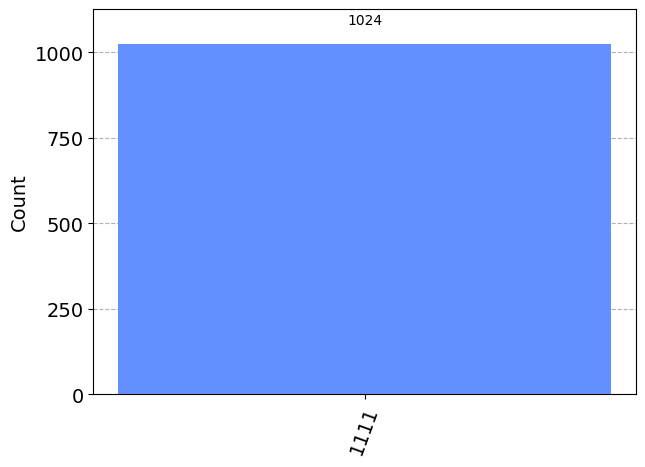

In [20]:
backend = BasicAer.get_backend('qasm_simulator')
results = execute(dj_circuit, backend=backend, shots=1024).result()
answer = results.get_counts()
plot_histogram(answer)

We can see from the results above that we have a 0% chance of measuring 0000. This correctly predicts the function is balanced.

# 6. Run on Real Quantum Hardware: IBM Quantum

In [21]:
IBMQ.save_account('968b660ec72b366d6a186e57dfc2e46fa7e98959c59ea968a95f33b464bdf07eda4f704f6bc4df4ff6b16af28e9ac53fee3518ce1116fe296e3cbe252cf47dd7')

IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')

<ipython-input-21-5c69e5c7a5fb>:1: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.save_account('968b660ec72b366d6a186e57dfc2e46fa7e98959c59ea968a95f33b464bdf07eda4f704f6bc4df4ff6b16af28e9ac53fee3518ce1116fe296e3cbe252cf47dd7')


Find Least busy device as set as backend

In [22]:
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= (n+1) and
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

least busy backend:  ibmq_manila


In [23]:
# Run our circuit on the least busy backend. Monitor the execution of the job in the queue
from qiskit.tools.monitor import job_monitor

shots = 1024
job = execute(dj_circuit, backend=backend, shots=shots, optimization_level=3)
#job.cancel()
job_monitor(job, interval = 2)

Job Status: job has successfully run


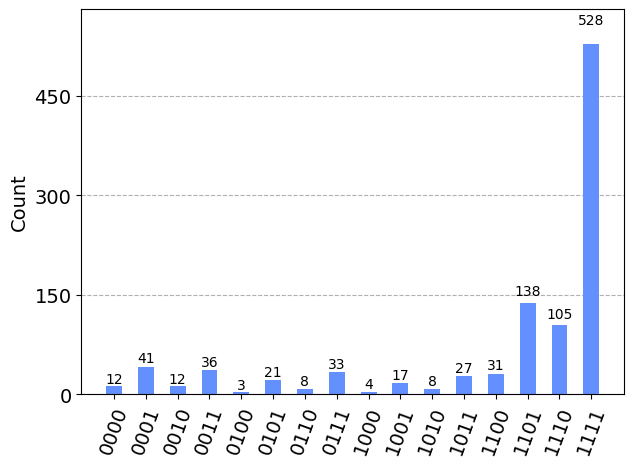

In [24]:
# Get the results of the computation
results = job.result()
answer = results.get_counts()

plot_histogram(answer)

As we can see, the most likely result is **1111**. The other results are due to errors in the quantum computation.